In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('dailysales.csv',parse_dates=['date'])

In [36]:
df.head(10)

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0
5,2018-01-06,385.0
6,2018-01-07,492.0
7,2018-01-08,142.0
8,2018-01-08,331.0
9,2018-01-09,249.0


In [37]:
"""
day_lst=[]
for i in df['date']:
    day_lst.append(i.day_name())

df['day_name']=day_lst
df.head(10)
"""

"\nday_lst=[]\nfor i in df['date']:\n    day_lst.append(i.day_name())\n\ndf['day_name']=day_lst\ndf.head(10)\n"

In [38]:
df

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0
...,...,...
699,2019-12-27,133.0
700,2019-12-28,214.1
701,2019-12-29,85.5
702,2019-12-30,182.9


In [39]:
df.shape

(704, 2)

In [40]:
df=df.groupby('date').sum()
df.head(10)

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0
2018-01-06,385.0
2018-01-07,492.0
2018-01-08,473.0
2018-01-09,249.0


In [41]:
#daily-->monthly
df=df.resample(rule='MS').sum()
df

,sales
date,
2018-01-01,9035.00
2018-02-01,9571.00
2018-03-01,13143.00
2018-04-01,12427.00
2018-05-01,8133.00
2018-06-01,7437.00
2018-07-01,11758.00
2018-08-01,9992.00
2018-09-01,7216.00


<Axes: xlabel='date'>

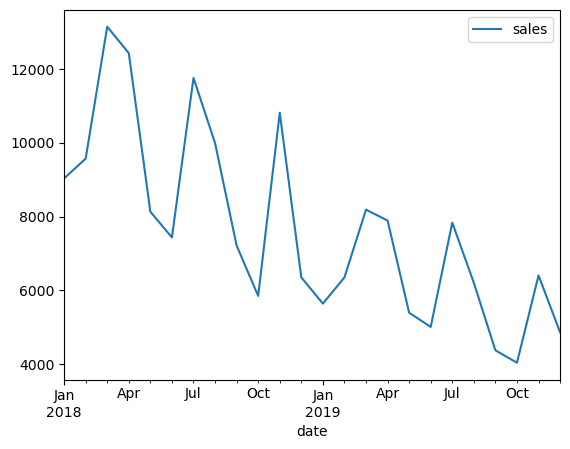

In [42]:
df.plot()

In [43]:
df.shape

(24, 1)

In [44]:
train=df[:19]
test=df[19:]

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [46]:
model=ExponentialSmoothing(train.sales,trend='add',seasonal='mul',seasonal_periods=4).fit()

In [47]:
pred=model.forecast(5)

In [48]:
pred

2019-08-01    6036.915032
2019-09-01    4132.161459
2019-10-01    3935.326147
2019-11-01    5994.175247
2019-12-01    4927.945274
Freq: MS, dtype: float64

In [52]:
dfpred=pd.DataFrame(pred,columns=['sales'])
dfpred

,sales
2019-08-01,6036.915032
2019-09-01,4132.161459
2019-10-01,3935.326147
2019-11-01,5994.175247
2019-12-01,4927.945274


<Axes: xlabel='date'>

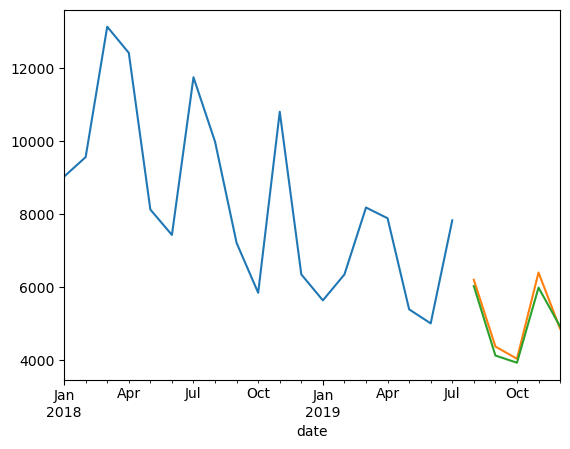

In [53]:
train['sales'].plot()
test['sales'].plot()
dfpred['sales'].plot()

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
np.sqrt(mean_squared_error(test,dfpred))

234.83582507475032

In [64]:
final_model=ExponentialSmoothing(df.sales,trend='add',seasonal='mul',seasonal_periods=4).fit()

In [65]:
pred=final_model.forecast(4)
pred

2020-01-01    3524.018735
2020-02-01    3319.791332
2020-03-01    4961.299873
2020-04-01    4022.591817
Freq: MS, dtype: float64

<Axes: xlabel='date'>

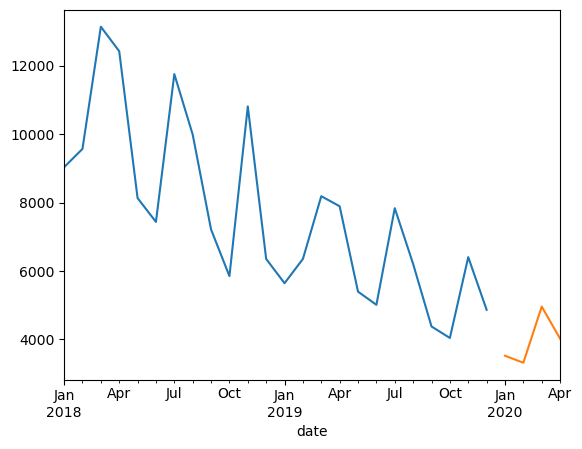

In [67]:
df['sales'].plot()
pred.plot(label='predictions')